In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("base_sarampion_confirmados.csv")

df['FECHA_DIAGNOSTICO'] = pd.to_datetime(df['FECHA_DIAGNOSTICO'])

In [41]:
df_norte = df[df['FECHA_DIAGNOSTICO'].dt.year.isin([2025, 2026])].copy()
df_norte = df_norte[df_norte['ENTIDAD_RES'].isin([8])]

In [42]:
# catálogo de municipios
cat_municipios = pd.read_excel("CATALOGO _MUNICIPIOS.xlsx")

# diccionario de búsqueda
cat_norte = cat_municipios[cat_municipios['CLAVE_ENTIDAD'].isin([8])]

# Creamos la llave compuesta (Estado, Municipio) 
diccionario_nombres = dict(zip(
    zip(cat_norte['CLAVE_ENTIDAD'], cat_norte['CLAVE_MUNICIPIO']), 
    cat_norte['MUNICIPIO']
))

# Creamos la columna 'MUNICIPIO_NOMBRE' 
df_norte['MUNICIPIO_NOMBRE'] = df_norte.apply(
    lambda row: diccionario_nombres.get((row['ENTIDAD_RES'], row['MUNICIPIO_RES']), 'DESCONOCIDO'), 
    axis=1
)

df_norte[['ENTIDAD_RES', 'MUNICIPIO_RES', 'MUNICIPIO_NOMBRE']]

,ENTIDAD_RES,MUNICIPIO_RES,MUNICIPIO_NOMBRE
204,8,17,CUAUHTÉMOC
205,8,17,CUAUHTÉMOC
206,8,17,CUAUHTÉMOC
208,8,54,RIVA PALACIO
209,8,17,CUAUHTÉMOC
...,...,...,...
6200,8,29,GUADALUPE Y CALVO
6674,8,36,JIMÉNEZ
6964,8,29,GUADALUPE Y CALVO
6965,8,29,GUADALUPE Y CALVO


In [50]:
# columna de Semana Epidemiológica 
df_norte['SEMANA_DIAG'] = df_norte['FECHA_DIAGNOSTICO'].dt.to_period('W').dt.start_time
df_series_municipios = df_norte.groupby(['SEMANA_DIAG', 'MUNICIPIO_NOMBRE']).size().unstack(fill_value=0)
print("semanas: ",len(df_series_municipios))
df_series_municipios.head()

semanas:  45


MUNICIPIO_NOMBRE,AHUMADA,ALDAMA,ALLENDE,AQUILES SERDÁN,ASCENSIÓN,BACHÍNIVA,BALLEZA,BATOPILAS DE MANUEL GÓMEZ MORÍN,BOCOYNA,BUENAVENTURA,...,PRAXEDIS G. GUERRERO,RIVA PALACIO,ROSALES,SAN FRANCISCO DE BORJA,SAN FRANCISCO DE CONCHOS,SANTA ISABEL,SAUCILLO,TEMÓSACHIC,URIQUE,URUACHI
SEMANA_DIAG,,,,,,,,,,,,,,,,,,,,,
2025-02-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-03-03,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2025-03-10,0,0,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,0,0,0
2025-03-17,0,0,0,0,0,1,0,0,0,3,...,0,3,0,0,0,0,0,0,0,0
2025-03-24,8,0,0,0,0,2,0,0,0,1,...,0,8,0,0,0,0,0,0,0,0


In [51]:
#rellenamos con 0's para obtener serie semanal completa

fecha_min = df_series_municipios.index.min()
fecha_max = df_series_municipios.index.max()

rango_completo = pd.date_range(start="2025-01-01", end=fecha_max, freq='W-MON')

df_series_completa = df_series_municipios.reindex(rango_completo, fill_value=0)

df_series_completa.index.name = 'SEMANA_DIAG'
df_series_completa = df_series_completa.reset_index()
df_series_completa.set_index(df_series_completa['SEMANA_DIAG'])

print(f"Semanas originales: {len(df_series_municipios)}")
print(f"Semanas en la serie completa: {len(df_series_completa)}")
df_series_completa.head()

Semanas originales: 45
Semanas en la serie completa: 54


MUNICIPIO_NOMBRE,SEMANA_DIAG,AHUMADA,ALDAMA,ALLENDE,AQUILES SERDÁN,ASCENSIÓN,BACHÍNIVA,BALLEZA,BATOPILAS DE MANUEL GÓMEZ MORÍN,BOCOYNA,...,PRAXEDIS G. GUERRERO,RIVA PALACIO,ROSALES,SAN FRANCISCO DE BORJA,SAN FRANCISCO DE CONCHOS,SANTA ISABEL,SAUCILLO,TEMÓSACHIC,URIQUE,URUACHI
0,2025-01-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2025-01-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2025-01-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2025-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2025-02-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_series_completa.index = df_series_completa['SEMANA_DIAG']

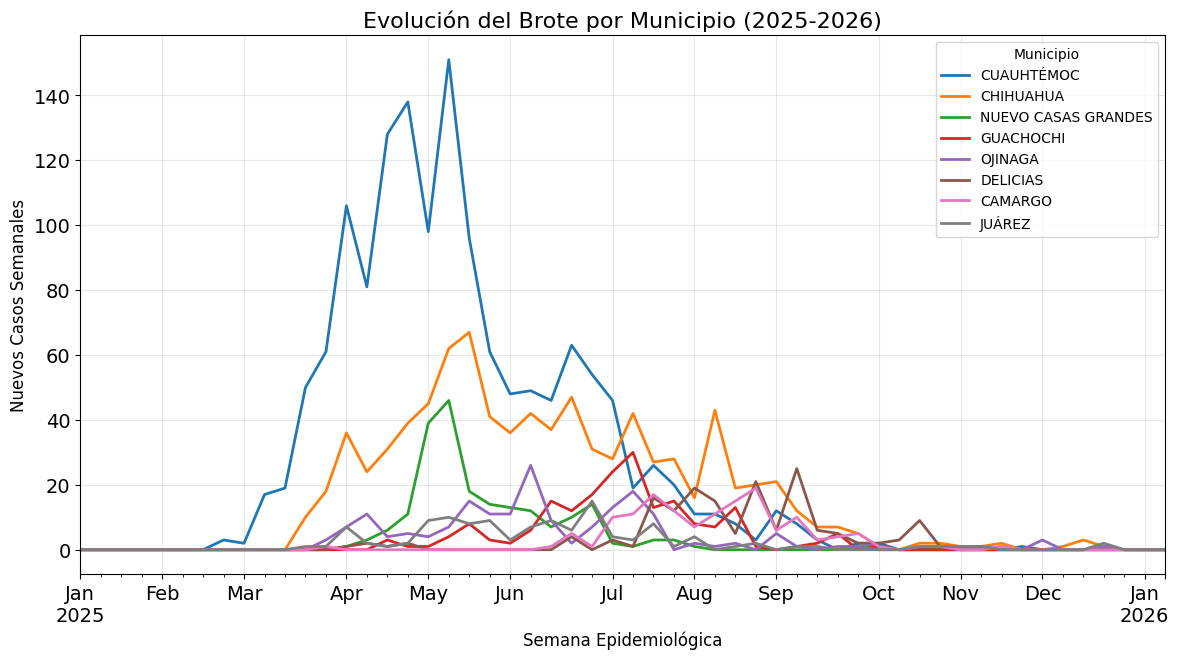

In [54]:
# top n
top_5_nombres = df_norte['MUNICIPIO_NOMBRE'].value_counts().head(8).index

plt.figure(figsize=(14, 7))
df_series_completa[top_5_nombres].plot(ax=plt.gca(), linewidth=2)

plt.title('Evolución del Brote por Municipio (2025-2026)', fontsize=16)
plt.xlabel('Semana Epidemiológica', fontsize=12)
plt.ylabel('Nuevos Casos Semanales', fontsize=12)
plt.legend(title='Municipio')
plt.grid(True, alpha=0.3)
plt.tick_params(labelsize=14)

plt.show()

In [55]:
df_series_completa.to_excel("serie_temporal_municipios.xlsx", index=False)